In [1]:
print("Chapter 2. End to End Machine Learning Project")

Chapter 2. End to End Machine Learning Project


In [2]:
# Function to get data
import os
import tarfile
import urllib

import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
# fetch_housing_data()
housing_data = load_housing_data()
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


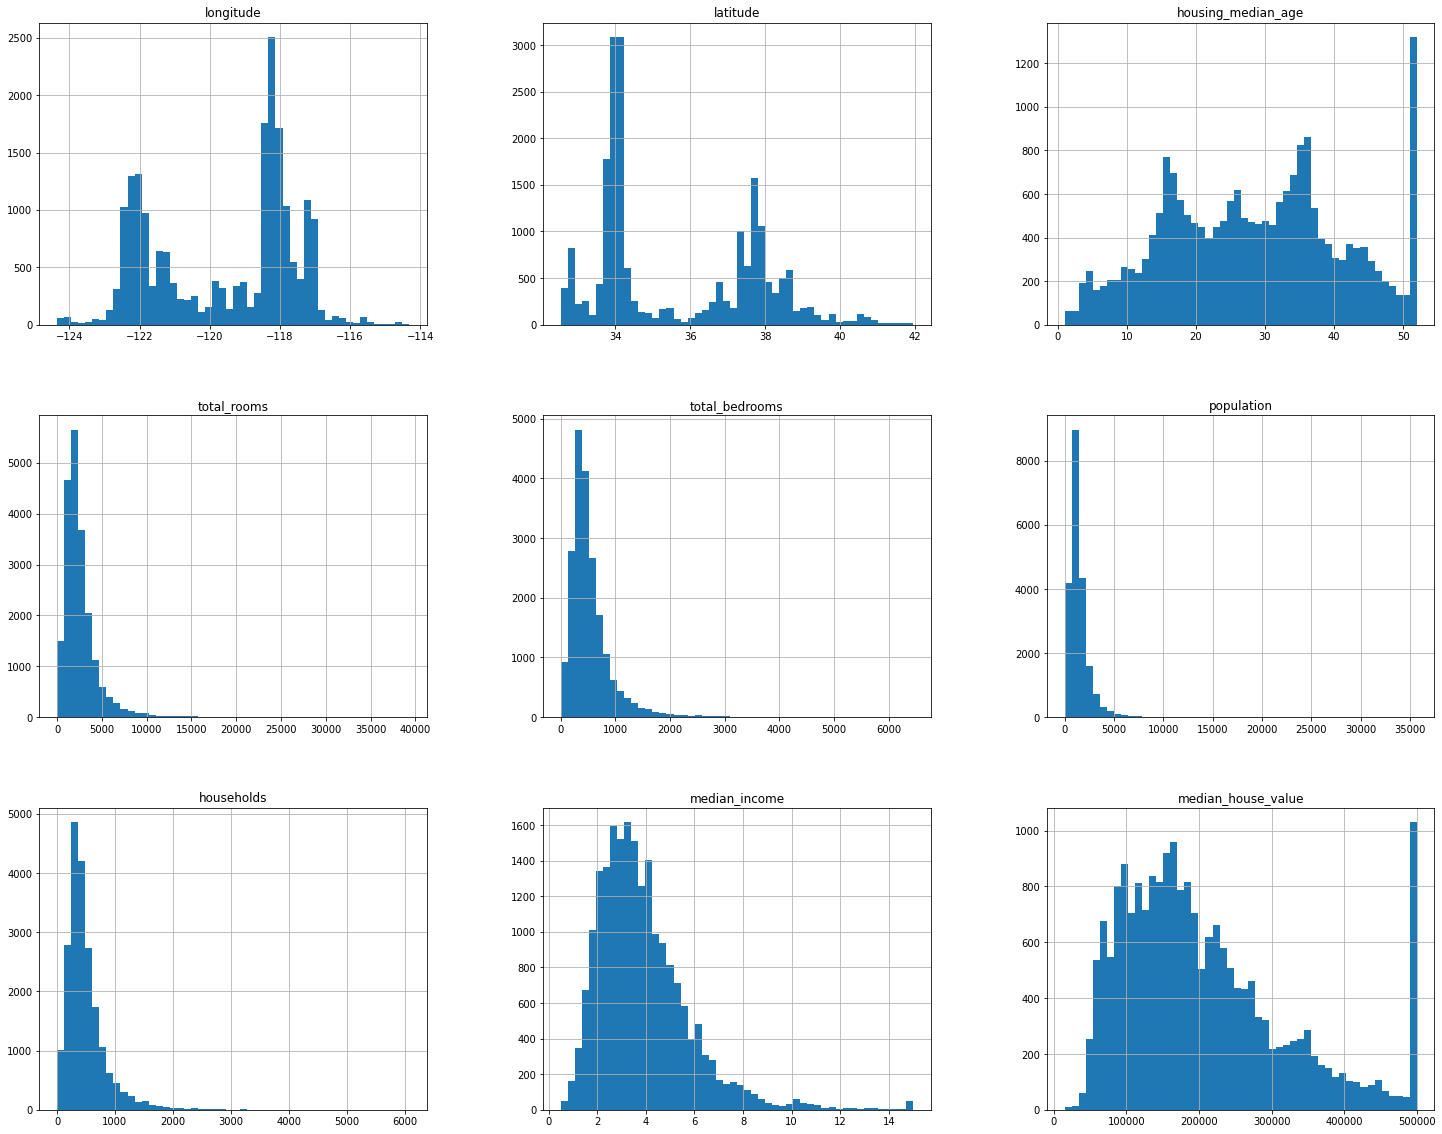

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(25,20))
plt.show()

In [5]:
# create test set
import numpy as np

def split_train_test(data=housing_data, test_ratio=0.2):
    data_size = len(data)
    shuffled_indices = np.random.permutation(data_size)
    test_set_size = int(data_size * test_ratio)
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
# hash based split
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identified)) & 0xffffffff < test_ratio * (2 **32)

def split_train_test_by_id(data=housing_data, test_ratio=0.2, id_column='index'):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.iloc[~in_test_set], data.loc[in_test_set]

In [7]:
# sklearn random sampler
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42) #seed 42

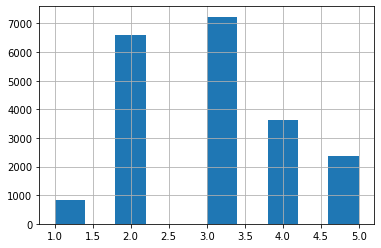

In [8]:
# stratified sampling with median_income
median_income_bins = pd.cut(housing_data["median_income"],
                            bins=[0., 1.5, 3., 4.5, 6., np.inf], 
                            labels=[1, 2, 3, 4, 5])
median_income_bins.hist()
housing_data["income_cat"] = median_income_bins

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [10]:
# Visualization

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

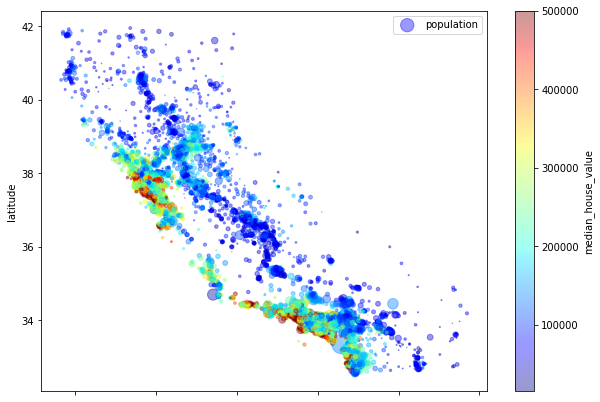

In [11]:
trainset_copy = strat_train_set.copy()
trainset_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                  s=trainset_copy["population"]/100, label='population', figsize=(10, 7),
                  c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)

In [12]:
corr_matrix = trainset_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

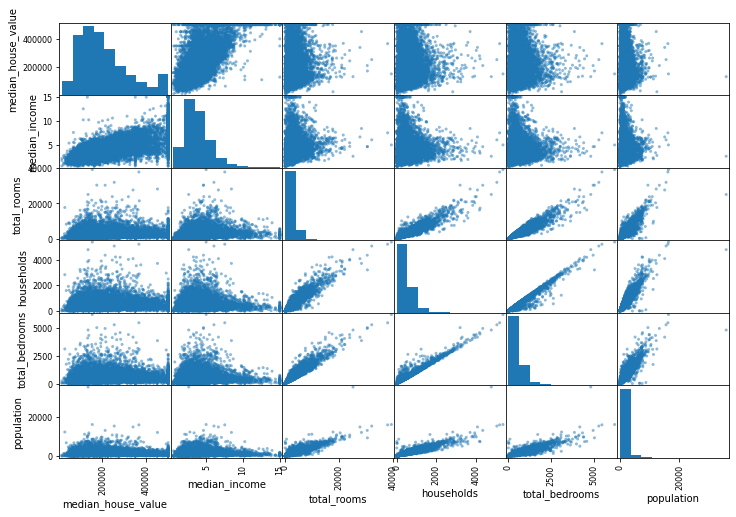

In [13]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'households', 'total_bedrooms', 'population']
scatter_matrix(trainset_copy[attributes], figsize=(12,8))
print()

median_house_value    1.000000
median_income         0.687151
households_by_pop     0.265362
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

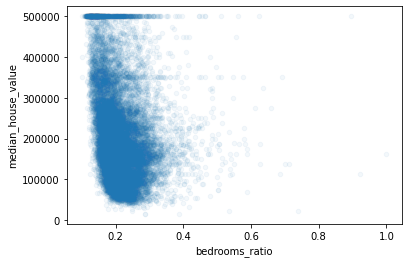

In [14]:
trainset_copy["bedrooms_ratio"] = trainset_copy['total_bedrooms']/trainset_copy['total_rooms']
trainset_copy["households_by_pop"] = trainset_copy['households']/trainset_copy['population']
trainset_copy.plot(kind='scatter', x='bedrooms_ratio', y='median_house_value', alpha=0.05)
trainset_copy.corr()["median_house_value"].sort_values(ascending=False)

In [15]:
# prep data for ML
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set["median_house_value"]
# for filling N/A values with median
# bedrooms_median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(bedrooms_median, inplace=True)

housing_num = housing.drop("ocean_proximity", axis=1)

from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")
median_imputer.fit(housing_num)
median_imputer.transform(housing_num)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [16]:
# ordianl encode categorial attributes to numerical

housing_cat = housing[["ocean_proximity"]]

from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()
housing_cat_encoded = ordinalEncoder.fit_transform(housing_cat)
ordinalEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [17]:
# one-hot-encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [18]:
# Custom transformers

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        households_per_population = X[:, households_ix]/X[:, population_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, households_per_population, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, households_per_population]
        
attr_addr = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attrs = attr_addr.fit_transform(housing.values)

In [19]:
# numerical pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_addr', CombinedAttributesAdder()),
    ('standard_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [20]:
# full pipeline

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

prepared_housing = full_pipeline.fit_transform(housing)

In [21]:
# Finally, training some models!
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(prepared_housing, housing_labels)

LinearRegression()

In [22]:
# metrics
from sklearn.metrics import mean_squared_error

housing_preds = linear_reg.predict(prepared_housing)
lin_mse = mean_squared_error(housing_labels, housing_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

65884.00228220873

In [23]:
# more powerful model
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(prepared_housing, housing_labels)

housing_pred_tree = dtree_reg.predict(prepared_housing)
tree_mse = mean_squared_error(housing_labels, housing_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [24]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score

def kfoldscores(predictor, data_set=prepared_housing, data_labels=housing_labels):
    kfold_scores = cross_val_score(predictor, data_set, data_labels, scoring='neg_mean_squared_error', cv=10)
    kfold_rmse = np.sqrt(-kfold_scores)
    print('Scores:', kfold_rmse)
    print('Mean:', kfold_rmse.mean())
    print('Standard Deviation:', kfold_rmse.std())

kfoldscores(dtree_reg)

Scores: [72645.99169926 71761.63751564 69495.18437653 72052.30294938
 71836.94625865 77323.45255648 72063.7137658  73036.18769778
 68137.42579776 69628.90862863]
Mean: 71798.17512459216
Standard Deviation: 2373.365918774086


In [25]:
kfoldscores(linear_reg)

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_housing, housing_labels)

kfoldscores(forest_reg)

Scores: [68937.45077174 62327.81914084 62102.91042549 66728.84564623
 63946.82570766 68692.25659362 70506.5126631  65915.44249099
 63536.05128904 68547.53144232]
Mean: 66124.1646171025
Standard Deviation: 2863.8858252479704
Scores: [51510.2028333  49335.41713611 46804.83188908 52099.43515758
 47472.25397869 51902.03338211 52452.00419313 49982.81162166
 49114.27678617 53610.6005754 ]
Mean: 50428.38675532342
Standard Deviation: 2129.4307023767274


In [26]:
# tuning
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(prepared_housing, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [27]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(grid_search.best_estimator_.feature_importances_, attributes), reverse=True)

[(0.34262587312288867, 'median_income'),
 (0.18959693777285297, 'INLAND'),
 (0.10998258728339062, 'pop_per_hhold'),
 (0.06952345908364041, 'longitude'),
 (0.06576030068278918, 'bedrooms_per_room'),
 (0.05983881810554629, 'latitude'),
 (0.04917494127816633, 'rooms_per_hhold'),
 (0.042939221609605886, 'housing_median_age'),
 (0.016242631858310683, 'total_rooms'),
 (0.015780300341521437, 'total_bedrooms'),
 (0.014788980414589675, 'population'),
 (0.014352924392659283, 'households'),
 (0.004589307177676162, '<1H OCEAN'),
 (0.002850246515710184, 'NEAR OCEAN'),
 (0.00183957360274162, 'NEAR BAY'),
 (0.00011389675791064797, 'ISLAND')]

In [28]:
# test the final model

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)


final_predictions = final_model.predict(X_test_prepared)
np.sqrt(mean_squared_error(final_predictions, Y_test))

48131.51205147306

In [29]:
# confidence intervals
from scipy import stats

confidence = 0.05
squared_errors = (final_predictions-Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))


array([48068.44167629, 48194.49988884])

In [30]:
from sklearn.svm import SVR

default_svm = SVR(kernel='rbf')
default_svm.fit(prepared_housing, housing_labels)

kfoldscores(default_svm)

Scores: [109585.41745919 112043.17249142 106104.83187576 112597.32701891
 106825.15398485 114903.81336942 112321.18686169 110838.89985983
 112256.98225922 111105.69526147]
Mean: 110858.2480441754
Standard Deviation: 2558.0110037323434


In [31]:
rbf_svm = SVR(kernel='rbf')
rbf_svm.fit(prepared_housing, housing_labels)

kfoldscores(default_svm)

Scores: [109585.41745919 112043.17249142 106104.83187576 112597.32701891
 106825.15398485 114903.81336942 112321.18686169 110838.89985983
 112256.98225922 111105.69526147]
Mean: 110858.2480441754
Standard Deviation: 2558.0110037323434


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])